In [1]:
%matplotlib inline
import pylab 

from predominantmelodymakam.PredominantMelodyMakam import PredominantMelodyMakam

import os 
import json
import scipy.io
import numpy


In [2]:
extractor = PredominantMelodyMakam()
audiofolder = '../nihavent--sazsemaisi--aksaksemai----mesut_cemil/ec902db5-6888-4570-9173-10a226c389f5/'

# we use an audio recording converted from the Robert Garfias's videos, mbid:d2731692-626d-4a6d-9b67-a70c9e7b9745
# this is a short excerpt starting from the 501st second
audiofile = os.path.join(audiofolder, 'ec902db5-6888-4570-9173-10a226c389f5.mp3') 

jsonfile = os.path.join(audiofolder, 'predominantMelody.json') # json file
matfile = os.path.join(audiofolder, 'predominantMelody.mat') # matlab file


In [3]:
print os.path.basename(audiofile)

results = extractor.run(audiofile)
pitch = results['settings']  # collapse the keys in settings
pitch['pitch'] = results['pitch']

# json file
json.dump(pitch, open(jsonfile, 'w'))

# matlab file
scipy.io.savemat(matfile, pitch)


ec902db5-6888-4570-9173-10a226c389f5.mp3


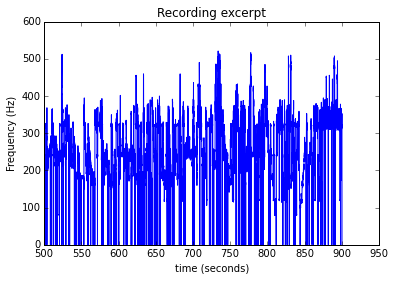

In [4]:
# plot 
tt = [p[0]+501.0 for p in results['pitch']]
pp = [p[1] for p in results['pitch']]

pylab.plot(tt, pp)
pylab.xlabel("time (seconds)")
pylab.ylabel("Frequency (Hz)")
pylab.title('Recording excerpt')
pylab.show()